In [12]:
from shapely import wkt
from shapely.geometry import Polygon
import h3
from pathlib import Path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [13]:
def hex_to_poly(hex_id: str) -> Polygon:
    coords = h3.cell_to_boundary(hex_id)
    polygon = Polygon([(t[1], t[0]) for t in coords])
    return polygon

In [15]:
path = Path("/Users/rfitzger/data/mep/mep3/output/2025-06-13-bambam-test")
df = pd.read_csv("../result.csv")

In [16]:
df["geometry"] = df.grid_id.apply(hex_to_poly)

In [17]:
df

,grid_id,isochrone_10,isochrone_20,isochrone_30,isochrone_40,lat,lon,mep,mep_entertainment,mep_food,...,opps_retail_40,opps_retail_total,opps_services_10,opps_services_20,opps_services_30,opps_services_40,opps_services_total,ram_mb,runtime,geometry
0,89268cd135bffff,00000000030000000100000015C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,39.772920,-104.973251,0.067641,0.000000,0.000000,...,0.0,29446.0,1.0,0.0,0.0,0.0,1343629.0,0.005783,NaN,"POLYGON ((-104.972185453813 39.77123803885777,..."
1,89268cd135bffff,00000000030000000100000017C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,00000000030000000100000017C05A3EB6C00000004043...,39.772920,-104.973251,0.067641,0.000000,0.000000,...,0.0,29446.0,1.0,0.0,0.0,0.0,1343629.0,0.005783,NaN,"POLYGON ((-104.972185453813 39.77123803885777,..."
2,89268cd134bffff,00000000030000000100000026C05A3E6AE00000004043...,00000000030000000100000045C05A3F0A400000004043...,000000000300000001000000C6C05A3E2D400000004043...,000000000300000001000000E1C05A3E55A00000004043...,39.769732,-104.973602,0.072068,0.000000,0.000000,...,0.0,29446.0,0.0,1.0,1.0,2.0,1343629.0,0.111313,NaN,POLYGON ((-104.97253611089886 39.7680497487726...
3,89268cd1343ffff,0000000003000000010000002EC05A3E04A00000004043...,00000000030000000100000046C05A3E37800000004043...,0000000003000000010000007BC05A3DC8400000004043...,0000000003000000010000007DC05A3DBDC00000004043...,39.771062,-104.969704,0.190272,0.000000,0.000000,...,0.0,29446.0,1.0,1.0,1.0,8.0,1343629.0,0.113182,NaN,POLYGON ((-104.96863809258392 39.7693794443750...
4,89268cdac87ffff,0000000003000000010000002FC05A3E5A600000004043...,00000000030000000100000056C05A3E4B600000004043...,00000000030000000100000080C05A3E4B800000004043...,000000000300000001000000BBC05A3E4C600000004043...,39.768402,-104.977500,0.105777,0.014245,0.000000,...,0.0,29446.0,0.0,1.0,1.0,7.0,1343629.0,0.135719,NaN,POLYGON ((-104.97643404979596 39.7667198985044...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,89268cda8d7ffff,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,39.748468,-104.990944,120.359903,30.007279,0.487096,...,0.0,29446.0,2425.0,0.0,0.0,0.0,1343629.0,20.857315,NaN,POLYGON ((-104.98987787090705 39.7467852531754...
275,89268cdac23ffff,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,39.755648,-104.978901,119.920871,29.219686,0.514157,...,0.0,29446.0,2433.0,0.0,0.0,0.0,1343629.0,20.857101,NaN,POLYGON ((-104.97783596564662 39.7539654992437...
276,89268cdac2bffff,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,39.754318,-104.982799,119.375210,28.904649,0.487096,...,0.0,29446.0,2427.0,0.0,0.0,0.0,1343629.0,20.857368,NaN,POLYGON ((-104.98173332922354 39.7526352491170...
277,89268cda893ffff,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,00000000030000000100000191C05A44D7400000004043...,39.751129,-104.983149,119.945912,29.928519,0.514157,...,0.0,29446.0,2415.0,0.0,0.0,0.0,1343629.0,20.856834,NaN,POLYGON ((-104.9820836301126 39.74944633970156...


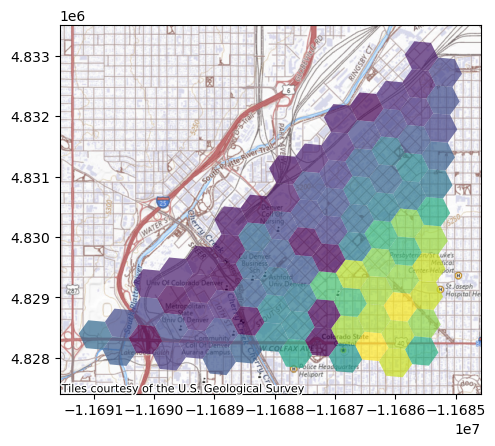

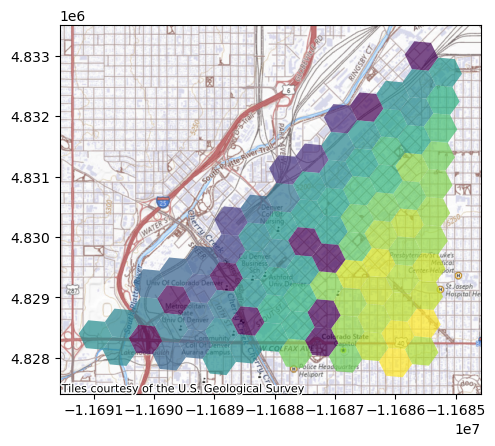

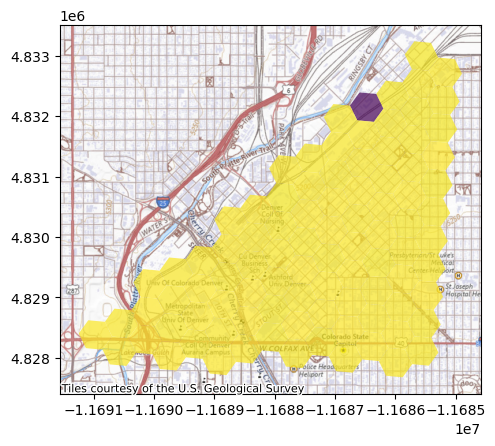

In [19]:
for mode in ["walk", "bike", "drive"]:
    subset = df[df["mode"]==mode].copy()
    gdf = gpd.GeoDataFrame(subset, crs="EPSG:4326").to_crs("EPSG:3857")
    fig, ax = plt.subplots() 
    gdf.plot("mep", ax=ax, alpha=0.7)
    ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
    fig.savefig(path / f"{mode}.png")

In [ ]:
net_path = Path("/Users/rfitzger/data/laci/tomtom_la_county")
net = pd.read_csv(net_path / "edges-complete.csv.gz")


DataSourceError: '/Users/rfitzger/data/laci/tomtom_la_county/edges-complete.csv.gz' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [19]:
net["geometry"] = net.geometry.apply(wkt.loads)
net = gpd.GeoDataFrame(net, crs="EPSG:4326")

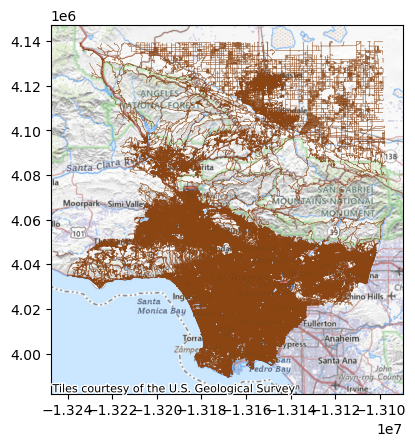

In [23]:
fig, ax = plt.subplots() 
net.to_crs("EPSG:3857").plot(ax=ax, alpha=0.7, color='saddlebrown', linewidth=0.3)
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)
# fig.savefig(path / f"{mode}.png")